## Notebook d'exploration et de traitement des données ##

### Importation et fonctions ###


#### Environnement de travail ####

In [35]:
# Manipulation de données
from collections import Counter
import pandas as pd
import numpy as np

# NLP
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


# DataViz
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Project modules
from config.paths import DATA_DIR

In [36]:
# Chargement des dictionnaires NLP de NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gaspardhurez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/gaspardhurez/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gaspardhurez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gaspardhurez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Importation des données ###

In [37]:
data = pd.read_csv(f'{DATA_DIR}/bronze/QueryResults.csv')
raw_data = data

In [38]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...,4,810,78143,NaN,13
1,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,11,1656,203728,NaN,42
2,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,13,721,311524,NaN,27
3,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...,19,353,71150,NaN,23
4,How to use the C socket API in C++ on z/OS,<p>I'm having issues getting the C sockets API...,<c++><c><sockets><mainframe><zos>,25,176,16560,NaN,9


#### Définition des fonctions ####

In [39]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [40]:
def normalize_text(text):
    return text.lower()

In [41]:
def tokenize_lemmatize_remove_stopwords(text):

    # Tokenisation
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)


    # Suppression des stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

In [42]:
def format_tags(text):
    tags = re.findall(r'<(.*?)>', text)
    return ','.join(tags)

In [43]:
def display_token_info(corpus):
    print(f'Le corpus contient {len(corpus)} tokens')

    unique_tokens = set(corpus.split())
    print(f"Le corpus contient {len(unique_tokens)} tokens uniques")

    print(f"Occurences moyennes par token: {len(corpus) / len(unique_tokens)}")

In [44]:
def plot_most_popular_tokens(corpus):
    token_counts = Counter(corpus.split())
    top_tokens = token_counts.most_common(20)
    tokens, counts = zip(*top_tokens)

    fig = px.bar(x=counts, y=tokens, orientation='h', title='20 tokens les plus populaires')
    fig.update_layout(xaxis_title='Count', yaxis_title='Token')
    fig.show()

In [45]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Nettoyage des données ###

#### Analyse préliminaire ####

##### Structure et aperçu des données ######

In [46]:
data.sample(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
5892,Is there an STL and UTF-8 friendly C++ Wrapper...,<p>I need a good Unicode library for C++. I ne...,<c++><unicode><stl><localization><icu>,511280,25,5573,NaN,3
11052,Eager loading not working in Rails 2.2.2,<p>I'm working with models analogous to the fo...,<ruby-on-rails><activerecord><include><associa...,847263,0,724,NaN,2
10653,"Forms control that allows zoom, pan AND POI",<p>For my phD project I need to do microscopy ...,<c#><winforms><zooming><pan><point-of-interest>,826664,5,1791,NaN,1
38557,Perl Regular Expressions to match a MD5 Hash?,"<p>Recently programming in PHP, I thought I ha...",<php><regex><perl><validation><md5>,2285793,9,8628,NaN,6
23693,Efficient MySQL query to find entries in A whe...,<p>I have a couple of tables (products and sup...,<mysql><join><left-join><outer-join><ubercart>,1552585,2,1775,NaN,1


In [47]:
data.shape

(50000, 8)

In [48]:
data.dtypes

Title             object
Body              object
Tags              object
Id                 int64
Score              int64
ViewCount          int64
FavoriteCount    float64
AnswerCount        int64
dtype: object

In [49]:
data.describe(include='object')

,Title,Body,Tags
count,50000,50000,50000
unique,49997,50000,49140
top,The ProxyFactoryFactory was not configured,<p>I want to assign the decimal variable &quot...,<sql><sql-server><sql-server-2005><t-sql><stor...
freq,2,1,22


In [50]:
data.describe()

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,5.000000e+04,50000.000000,5.000000e+04,0.0,50000.000000
mean,1.564775e+06,25.334080,2.363893e+04,NaN,3.600180
std,7.714602e+05,217.162466,1.495958e+05,NaN,3.991226
min,4.000000e+00,-6.000000,2.900000e+01,NaN,1.000000
25%,9.314418e+05,1.000000,1.041000e+03,NaN,2.000000
50%,1.616512e+06,2.000000,2.649000e+03,NaN,3.000000
75%,2.242424e+06,7.000000,8.294000e+03,NaN,4.000000
max,2.780304e+06,20374.000000,1.177092e+07,NaN,130.000000


##### Valeurs manquantes #####

In [51]:
data.isna().sum()

Title                0
Body                 0
Tags                 0
Id                   0
Score                0
ViewCount            0
FavoriteCount    50000
AnswerCount          0
dtype: int64

In [52]:
data.isna().mean()

Title            0.0
Body             0.0
Tags             0.0
Id               0.0
Score            0.0
ViewCount        0.0
FavoriteCount    1.0
AnswerCount      0.0
dtype: float64

##### Valeurs dupliquées #####

In [53]:
data.duplicated().sum()

np.int64(0)

In [54]:
data.nunique()

Title            49997
Body             50000
Tags             49140
Id               50000
Score              807
ViewCount        18272
FavoriteCount        0
AnswerCount         66
dtype: int64

In [55]:
duplicates_mask = data.duplicated(subset=['Title'], keep=0)

In [56]:
data[duplicates_mask]

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
13196,The ProxyFactoryFactory was not configured,"<p>Considering this example as a base example,...",<asp.net><nhibernate><nhibernate-mapping><nhib...,973979,11,19188,NaN,5
17297,The ProxyFactoryFactory was not configured,<p>We have recently upgraded our windows forms...,<c#><winforms><visual-studio-2008><nhibernate>...,1209106,4,10423,NaN,4
29378,You are not authorized to view this page,<p>I am getting the following error while brow...,<asp.net><iis><web-applications><iis-7><web-co...,1848459,1,2413,NaN,1
29589,You are not authorized to view this page,<p>I am getting the following error while brow...,<asp.net><iis><deployment><web-config><webserver>,1859539,1,5529,NaN,1
38153,JQuery BlockUI with UpdatePanel Viewstate Issue,<p>I have an update panel within a div that I ...,<asp.net><jquery><updatepanel><viewstate><bloc...,2269585,2,2526,NaN,2
38160,JQuery BlockUI with UpdatePanel Viewstate Issue,<p>I am using BlockUI to show a modal. Within ...,<asp.net><jquery><updatepanel><viewstate><bloc...,2269797,4,3611,NaN,4


In [57]:
for row in data[duplicates_mask].Body:
    print("Body: " + row[0:100])

Body: <p>Considering this example as a base example, I created the application but when I execute this app
Body: <p>We have recently upgraded our windows forms C# project from NHibernate 2.0 to 2.1. We updated our
Body: <p>I am getting the following error while browsing the my webpage </p>

<p>i checked and seen anaymo
Body: <p>I am getting the following error while browsing my asp.net page deployed in IIS</p>

<pre><code>Y
Body: <p>I have an update panel within a div that I modal using the JQuery plugin BlockUI. Inside the Upda
Body: <p>I am using BlockUI to show a modal. Within the blocked modal I have an update panel. Within the u


Il ne semble pas y'avoir de vrais doublons dans ce jeu de données.

##### Valeurs aberrantes #####

In [58]:
data.dtypes

Title             object
Body              object
Tags              object
Id                 int64
Score              int64
ViewCount          int64
FavoriteCount    float64
AnswerCount        int64
dtype: object

In [59]:
numeric_cols = list(data.select_dtypes(include='number').columns)
numeric_cols.remove('Id')
numeric_cols

['Score', 'ViewCount', 'FavoriteCount', 'AnswerCount']

In [60]:
# Distributions des variables numériques
n_rows = 2
n_cols = 2

fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=numeric_cols, )

for i, col in enumerate(numeric_cols):
    row_index = i // n_cols + 1
    col_index = i % n_cols + 1
    fig.add_trace(go.Histogram(x=data[col]), row=row_index, col=col_index)

fig.update_layout(
    height=300 * n_rows, 
    showlegend=False, 
    title='Distribution des variables numériques'
    )
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [28]:
data.sort_values(by='ViewCount', ascending=False).head(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
32323,How do I delete a Git branch locally and remot...,<p>Failed Attempts to Delete a Remote Branch:<...,<git><version-control><git-branch><git-push><g...,2003505,20374,11770919,NaN,41
15867,"How do I force ""git pull"" to overwrite local f...",<p>How do I force an overwrite of local files ...,<git><version-control><overwrite><git-pull><gi...,1125968,9730,8729352,NaN,54
49657,How do I push a new local branch to a remote G...,<p>How do I:</p>\n<ol>\n<li><p>Create a local ...,<git><repository><git-branch><git-push><git-re...,2765421,5698,6166413,NaN,20
39653,How do I UPDATE from a SELECT in SQL Server?,"<p>In <strong>SQL Server</strong>, it is possi...",<sql><sql-server><t-sql><sql-update><dml>,2334712,4287,5390183,NaN,40
715,How do I execute a program or call a system co...,<p>How do I call an external command within Py...,<python><shell><terminal><subprocess><command>,89228,6176,4842772,NaN,66


Certains posts peuvent clairement être qualifiés d'outliers au niveau des métriques d'engagement (vues, réponses).  
Pour autant, après inspection de certains des posts les plus vus, ces valeurs ne semblent pas forcément impossibles sur un site comme StackOverflow.

#### Nettoyage ####

##### Sélection des colonnes #####

- La variable FavoriteCount ne contient que des valeurs nulles; il convient de la supprimer.
- La colonne Id n'aura pas d'intérêt pour ce projet d'analyse textuelle.
- Je garde pour l'instant les métriques d'engagement, qui permettront potentiellement une analyse multivariée intéressante.

In [29]:
data.drop(columns=['FavoriteCount', 'Id'], inplace=True)

In [30]:
data.head()

,Title,Body,Tags,Score,ViewCount,AnswerCount
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...,810,78143,13
1,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,1656,203728,42
2,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,721,311524,27
3,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...,353,71150,23
4,How to use the C socket API in C++ on z/OS,<p>I'm having issues getting the C sockets API...,<c++><c><sockets><mainframe><zos>,176,16560,9


##### Typage des données #####

Toutes les variables ont le bon type de données.

##### Valeurs manquantes #####

Il n'y a plus de colonne contenant des valeurs manquantes.

##### Valeurs dupliquées #####

Il n'y a pas de valeurs dupliquées dans ce jeu de données.

##### Valeurs aberrantes #####

Au vu du contexte du projet, il n'y a peu/pas d'intérêt à supprimer les valeurs extrêmes observées, ou à transformer les distributions.

### Traitement des données textuelles ###

Il faut maintenant nettoyer et formater les données textuelles pour faciliter leur analyse et leur exploitation lors de la modélisation.

#### Suppression des balises HTML ####

Le corps de texte des questions est intégré dans des balises HTML `<p>`. Je vais les supprimer.

In [31]:
data.Body[0]

'<p>I want to assign the decimal variable &quot;trans&quot; to the double variable &quot;this.Opacity&quot;.</p>\n<pre class="lang-cs prettyprint-override"><code>decimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n</code></pre>\n<p>When I build the app it gives the following error:</p>\n<blockquote>\n<p>Cannot implicitly convert type decimal to double</p>\n</blockquote>\n'

In [32]:
data['clean_body'] = data.Body.apply(remove_html_tags)

In [33]:
data.clean_body[0]

'I want to assign the decimal variable "trans" to the double variable "this.Opacity".\ndecimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n\nWhen I build the app it gives the following error:\n\nCannot implicitly convert type decimal to double\n\n'

#### Formatage des tags ####

Les tags sont séparés par des chevrons; je les remplace par une virgule séparatrice, après m'être assuré qu'il n'y a pas de virgule dans le texte de base.

In [34]:
data.Tags.str.cat(sep=' ').count(',')

0

In [35]:
data['processed_tags'] = data.Tags.apply(format_tags)

In [36]:
data.processed_tags

0        c#,floating-point,type-conversion,double,decimal
1            c#,datetime,time,datediff,relative-time-span
2        html,browser,timezone,user-agent,timezone-offset
3         performance,algorithm,language-agnostic,unix,pi
4                             c++,c,sockets,mainframe,zos
                               ...                       
49995          javascript,jquery,html,css,jquery-validate
49996           python,performance,profiling,gis,cprofile
49997     c#,wpf,silverlight,silverlight-3.0,media-player
49998                          c++,c,windows,registry,wmi
49999                    c++,qt,qt4,signals,signals-slots
Name: processed_tags, Length: 50000, dtype: object

#### Normalisation ####

Je normalise le texte en mettant le titre et le corps de texte en minuscules.

In [37]:
data['body_normalized'] = data.clean_body.apply(normalize_text)
data['title_normalized'] = data.Title.apply(normalize_text)

In [38]:
data.head()

,Title,Body,Tags,Score,ViewCount,AnswerCount,clean_body,processed_tags,body_normalized,title_normalized
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...,810,78143,13,"I want to assign the decimal variable ""trans"" ...","c#,floating-point,type-conversion,double,decimal","i want to assign the decimal variable ""trans"" ...",how to convert decimal to double in c#?
1,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,1656,203728,42,"Given a specific DateTime value, how do I disp...","c#,datetime,time,datediff,relative-time-span","given a specific datetime value, how do i disp...",calculate relative time in c#
2,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,721,311524,27,Is there a standard way for a web server to be...,"html,browser,timezone,user-agent,timezone-offset",is there a standard way for a web server to be...,determine a user's timezone
3,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...,353,71150,23,I'm looking for the fastest way to obtain the ...,"performance,algorithm,language-agnostic,unix,pi",i'm looking for the fastest way to obtain the ...,what is the fastest way to get the value of π?
4,How to use the C socket API in C++ on z/OS,<p>I'm having issues getting the C sockets API...,<c++><c><sockets><mainframe><zos>,176,16560,9,I'm having issues getting the C sockets API to...,"c++,c,sockets,mainframe,zos",i'm having issues getting the c sockets api to...,how to use the c socket api in c++ on z/os


#### Tokenization et lemmatisation ####

Je vais maintenant tokeniser et lemmatiser mes données textuelles pour faciliter leur manipulation ultérieure.

In [39]:
data['processed_title_tokens'] = data.title_normalized.apply(tokenize_lemmatize_remove_stopwords)
data['processed_body_tokens'] = data.body_normalized.apply(tokenize_lemmatize_remove_stopwords)

In [40]:
data[['processed_title_tokens', 'processed_body_tokens']].head()

,processed_title_tokens,processed_body_tokens
0,"[convert, decimal, double, c]","[want, assign, decimal, variable, trans, doubl..."
1,"[calculate, relative, time, c]","[given, specific, datetime, value, display, re..."
2,"[determine, user, timezone]","[standard, way, web, server, able, determine, ..."
3,"[fastest, way, get, value, π]","[looking, fastest, way, obtain, value, π, pers..."
4,"[use, c, socket, api, c, z, o]","[issue, getting, c, socket, api, work, properl..."


#### Constitution des corpus ####

Je sélectionne d'abord les colonnes de texte traité.

In [41]:
relevant_cols = ['processed_title_tokens', 'processed_body_tokens', 'processed_tags']

In [42]:
data = data[relevant_cols]

Je stocke mes corpus de texte dans des variables, pour plus de praticité.

In [43]:
corpus_titles = ' '.join(data.processed_title_tokens.apply(lambda tokens: ' '.join(tokens)))
corpus_bodies = ' '.join(data.processed_body_tokens.apply(lambda tokens: ' '.join(tokens)))
corpus_tags = data.processed_tags.str.cat(sep=' ').replace(",", " ")

J'exporte le jeu de données pour pouvoir réaliser les prochaines opérations (extraction de features, modélisation).

In [51]:
data.to_json(f'{DATA_DIR}/silver/processed_data.json')

In [50]:
data.processed_title_tokens.apply(lambda tokens: ' '.join(tokens))

0                                 convert decimal double c
1                                calculate relative time c
2                                  determine user timezone
3                                  fastest way get value π
4                                   use c socket api c z o
                               ...                        
49995     jquery validation using class instead name value
49996    python script spending time missing time cprof...
49997    set playlist index mediaplayer expressionmedia...
49998      deny access run certain installed software user
49999                              track emitted signal qt
Name: processed_title_tokens, Length: 50000, dtype: object

In [47]:
data

,processed_title_tokens,processed_body_tokens,processed_tags
0,"[convert, decimal, double, c]","[want, assign, decimal, variable, trans, doubl...","c#,floating-point,type-conversion,double,decimal"
1,"[calculate, relative, time, c]","[given, specific, datetime, value, display, re...","c#,datetime,time,datediff,relative-time-span"
2,"[determine, user, timezone]","[standard, way, web, server, able, determine, ...","html,browser,timezone,user-agent,timezone-offset"
3,"[fastest, way, get, value, π]","[looking, fastest, way, obtain, value, π, pers...","performance,algorithm,language-agnostic,unix,pi"
4,"[use, c, socket, api, c, z, o]","[issue, getting, c, socket, api, work, properl...","c++,c,sockets,mainframe,zos"
...,...,...,...
49995,"[jquery, validation, using, class, instead, na...","[like, validate, form, using, jquery, validate...","javascript,jquery,html,css,jquery-validate"
49996,"[python, script, spending, time, missing, time...","[attempting, profile, long, running, python, s...","python,performance,profiling,gis,cprofile"
49997,"[set, playlist, index, mediaplayer, expression...","[mediaplayer, control, xaml, page, like, custo...","c#,wpf,silverlight,silverlight-3.0,media-player"
49998,"[deny, access, run, certain, installed, softwa...","[list, installed, software, obtained, wmi, cla...","c++,c,windows,registry,wmi"


### Exploration du vocabulaire ### 

#### Analyse du corpus de titres ####

In [ ]:
display_token_info(corpus_titles)

Le corpus contient 2144795 tokens
Le corpus contient 18920 uniques
Occurences moyennes par token: 113.36125792811839


In [ ]:
plot_most_popular_tokens(corpus_titles)

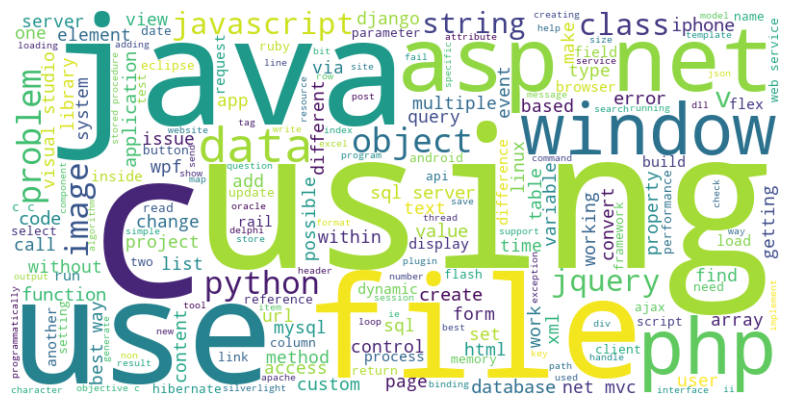

In [ ]:
generate_wordcloud(corpus_titles)

#### Analyse du corpus de corps de texte ####

In [ ]:
display_token_info(corpus_bodies)

Le corpus contient 34965354 tokens
Le corpus contient 194932 uniques
Occurences moyennes par token: 179.3720579484128


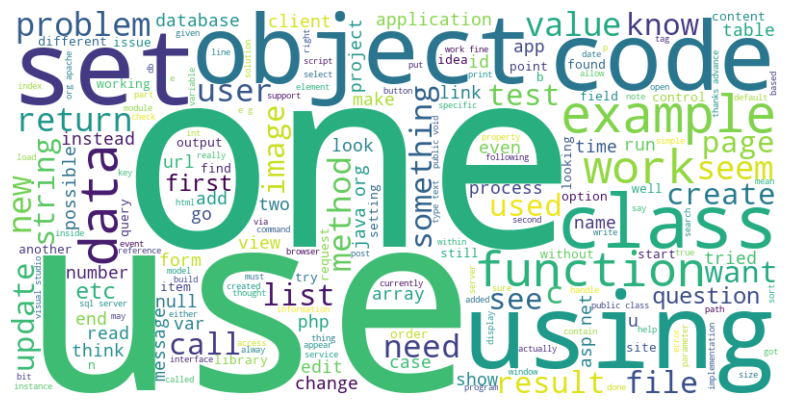

In [ ]:
generate_wordcloud(corpus_bodies)

In [ ]:
plot_most_popular_tokens(corpus_bodies)

#### Analyse du corpus de tags ####

In [ ]:
display_token_info(corpus_tags)

Le corpus contient 2222568 tokens
Le corpus contient 13347 uniques
Occurences moyennes par token: 166.52191503708698


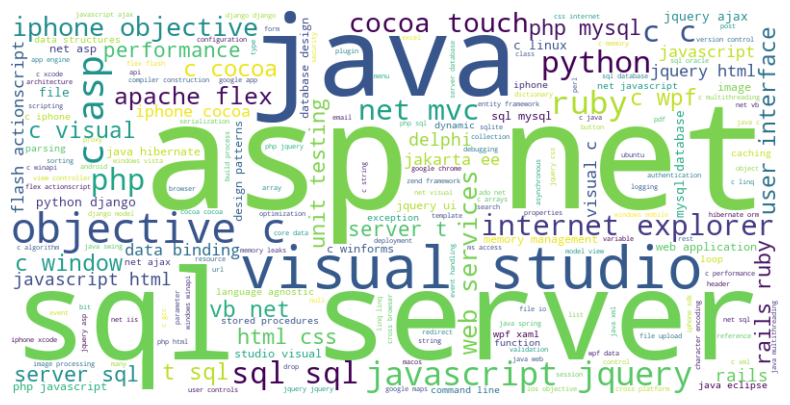

In [ ]:
generate_wordcloud(corpus_tags)

In [ ]:
plot_most_popular_tokens(corpus_tags)